[View in Colaboratory](https://colab.research.google.com/github/anu0508/new-inning/blob/master/affair_assignment4.ipynb)

In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
data = sm.datasets.fair.load_pandas().data

In [21]:
data.shape

(6366, 9)

In [3]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [4]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [0]:
data['affair'] = (data.affairs > 0).astype(int) # new column with int value 1 and 0


In [6]:
data['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
affair             6366 non-null int64
dtypes: float64(9), int64(1)
memory usage: 497.4 KB


In [23]:
data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [0]:
dropped= data.drop(columns=['affairs'],axis=1,inplace=True)

In [25]:
data.shape

(6366, 9)

In [28]:
data.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affair'],
      dtype='object')

In [40]:
data.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affair               int64
dtype: object

In [0]:
y=data.pop('affair')

In [0]:
dummies=pd.get_dummies(data)

In [44]:
dummies

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0


In [0]:
data=pd.concat([data,y],axis=1)

In [0]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',data, return_type="dataframe")

In [49]:
y.head()

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [51]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [0]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',data, return_type="dataframe")

In [59]:
print(y.head())
print(y.shape)
print(X.shape)

   affair
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
(6366, 1)
(6366, 17)


In [60]:
print(type(y))
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [61]:
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [0]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2','C(occupation)[T.3.0]':'occ_3','C(occupation)[T.4.0]':'occ_4','C(occupation)[T.5.0]':'occ_5','C(occupation)[T.6.0]':'occ_6','C(occupation_husb)[T.2.0]':'occ_husb_2','C(occupation_husb)[T.3.0]':'occ_husb_3','C(occupation_husb)[T.4.0]':'occ_husb_4','C(occupation_husb)[T.5.0]':'occ_husb_5','C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [63]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [66]:
print(y.shape)
print(X.shape)
y=np.ravel(y)

(6366, 1)
(6366, 17)


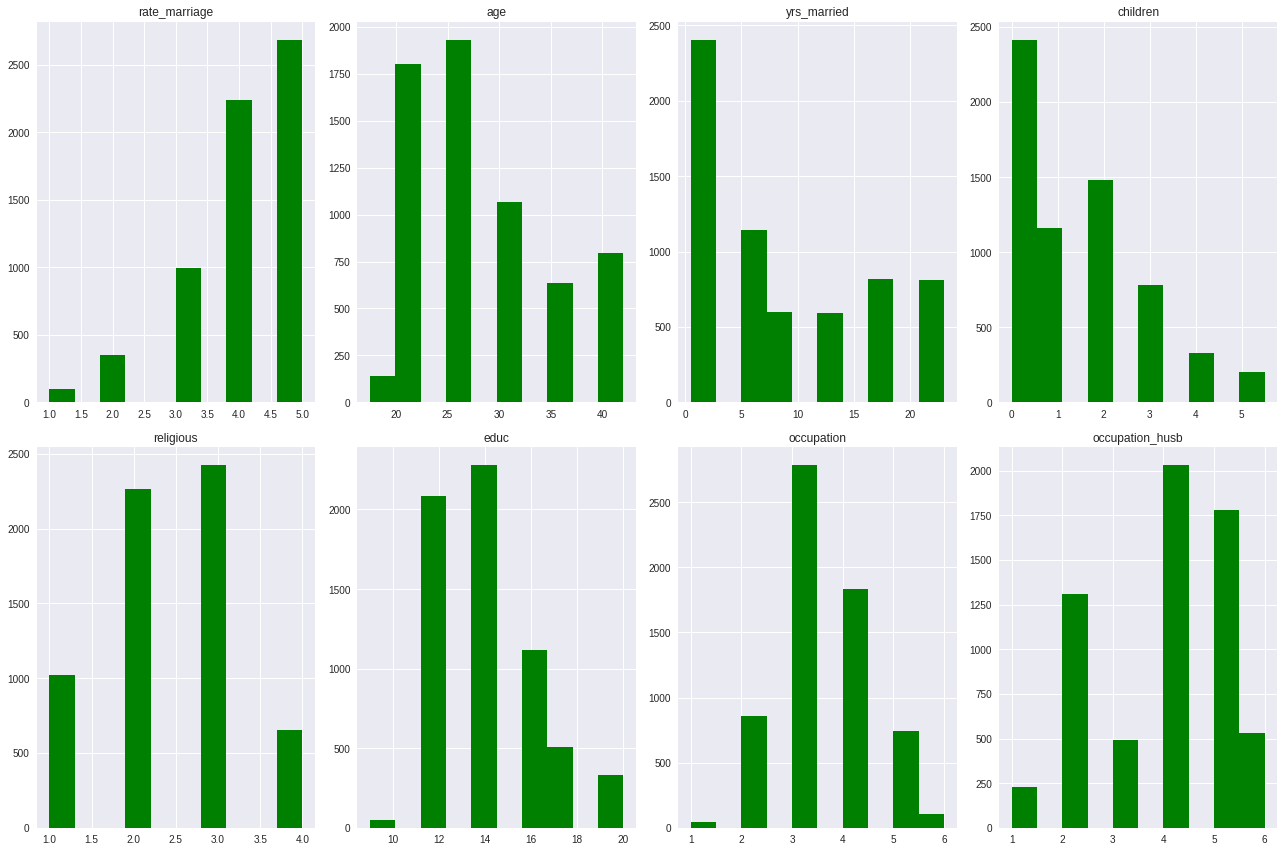

In [65]:
columns=list(data.columns.values)
fig,axes=plt.subplots(2,4, figsize=(18,12))
for i, ax in enumerate(axes.flat):
    if i<10:
        ax.hist(data[columns[i]],color='green')
        ax.set_title(columns[i])
plt.tight_layout()

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=31)

In [0]:
classifier=LogisticRegression()

In [76]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_pred= classifier.predict(X_test)

In [78]:
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7329842931937173

In [80]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test,y_test )))

Accuracy of logistic regression classifier on test set: 0.73


In [0]:
import sklearn.model_selection as model_select
results = model_select.cross_val_score(classifier, X, y, cv=10, scoring='accuracy')

In [82]:
results

array([0.72100313, 0.70219436, 0.73824451, 0.70597484, 0.70597484,
       0.72955975, 0.7327044 , 0.70440252, 0.75157233, 0.75      ])

In [83]:
results.mean()

0.7241630685514876

In [84]:
from sklearn.metrics import confusion_matrix
cmat=confusion_matrix(y_test,y_pred)
print(cmat)

[[1310  125]
 [ 436  230]]


In [85]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.542911
         Iterations 6


In [86]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6349
Method:                           MLE   Df Model:                           16
Date:                Wed, 25 Jul 2018   Pseudo R-squ.:                  0.1365
Time:                        12:02:01   Log-Likelihood:                -3456.2
converged:                       True   LL-Null:                       -4002.5
                                        LLR p-value:                1.534e-222
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.9708      0.572      5.192      0.000       1.849       4.092
occ_2             0.3902      0.448      0.872      0.383      -0.487       1.267
occ_3             0.7027      0.441      1.592      0.111      -0.163       1.568
occ_4             0.4714      0.443      1.065      0.287      -0.396       1.339
occ_5             1.0542      0.447      2.360      0.018       0.179       1.930
occ_6             1.1080      0.494      2.242      0.025       0.139       2.077
occ_husb_2        0.1704      0.186      0.916      0.360      -0.194       0.535
occ_husb_3        0.2842      0.202      1.406      0.160      -0.112       0.680
occ_husb_4        0.1428      0.181      0.789      0.430      -0.212       0.498
occ_husb_5        0.1723      0.183      0.944      0.345      -0.186       0.530
occ_husb_6        0.1828      0.204      0.897      0.369      -0.216       0.582
rate_marriage    -0.7102      0.031    -22.560      0.000      -0.772      -0.649
age              -0.0613      0.010     -5.936      0.000      -0.082      -0.041
yrs_married       0.1080      0.011      9.836      0.000       0.086       0.129
children          0.0156      0.032      0.488      0.625      -0.047       0.078
religious        -0.3754      0.035    -10.766      0.000      -0.444      -0.307
educ             -0.0017      0.017     -0.099      0.921      -0.036       0.032
=================================================================================
"""

In [87]:
import statsmodels.api as sm
logit_model=sm.Logit(y,data)
result=logit_model.fit()

         Current function value: 0.000000
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [88]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6357
Method:                           MLE   Df Model:                            8
Date:                Wed, 25 Jul 2018   Pseudo R-squ.:                   1.000
Time:                        12:03:37   Log-Likelihood:            -8.5161e-05
converged:                      False   LL-Null:                       -4002.5
                                        LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
rate_marriage      -0.2907    101.110     -0.003      0.998    -198.463     197.882
age                -0.5475     31.887     -0.017      0.986     -63.045      61.949
yrs_married         0.4892     35.619      0.014      0.989     -69.322      70.300
children           -0.9302    108.015     -0.009      0.993    -212.637     210.776
religious           0.4728    135.516      0.003      0.997    -265.134     266.080
educ               -0.7322     59.337     -0.012      0.990    -117.030     115.565
occupation          1.2063    100.433      0.012      0.990    -195.638     198.051
occupation_husb    -0.5894     94.894     -0.006      0.995    -186.578     185.400
affair             43.6379    556.223      0.078      0.937   -1046.540    1133.816
===================================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""